In [1]:
import numpy as np

In [2]:
class MatrizOperacoes:
    def __init__(self, matriz):
        self.matriz = np.array(matriz)

    def trace(self):
        return np.trace(self.matriz)

    def transposta(self):
        return np.transpose(self.matriz)

    def determinante(self):
        return np.linalg.det(self.matriz)
    
    def matriz_cofatores(self):
        shape = self.matriz.shape
        cofatores = np.zeros(shape)
        
        for i in range(shape[0]):
            for j in range(shape[1]):
                submatriz = np.delete(np.delete(self.matriz, i, axis=0), j, axis=1)
                #calcula o cofator
                cofator = (-1) ** (i + j) * np.linalg.det(submatriz)
                cofatores[i, j] = cofator
        
        return cofatores

    def matriz_adjunta(self):
        aux = self.matriz_cofatores()
        return np.transpose(aux)
    
    def inversa(self):
        if (self.determinante() != 0):
            return (1/self.determinante()) * self.matriz_adjunta()
        else:
            return "Matriz não tem inversa pois determinante é 0"
        
    def autovalores(self):
        autovalores, _ = np.linalg.eig(self.matriz)
        return autovalores
    

    def autovetores(self):
        _, autovetores = np.linalg.eig(self.matriz)
        return autovetores

# Exemplo de uso:
matriz_exemplo = np.array([[1, 2, 3],
                           [4, 5, 6],
                           [7, 8, 9]])


matriz_exemplo = [[2, 0],
                  [0, 1]]

up = MatrizOperacoes(matriz_exemplo)
print(up.autovetores())


[[1. 0.]
 [0. 1.]]


### Cofator
- Faz a cruz
- Determinante
- Determinante * -1 elevado a i+j (se i+j for ímpar, é -1)

### Matriz adjunta
- É a transposta da matriz dos cofatores

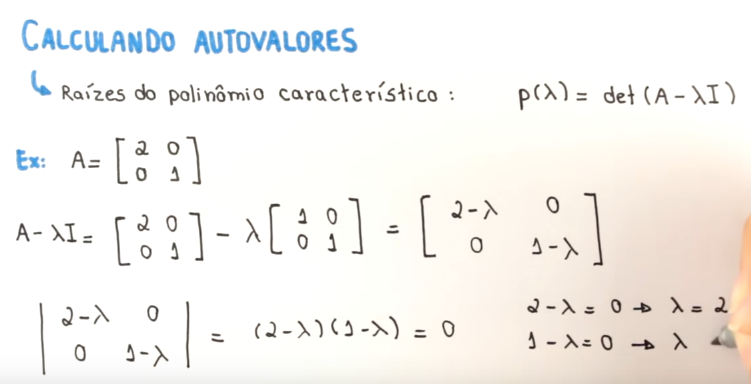

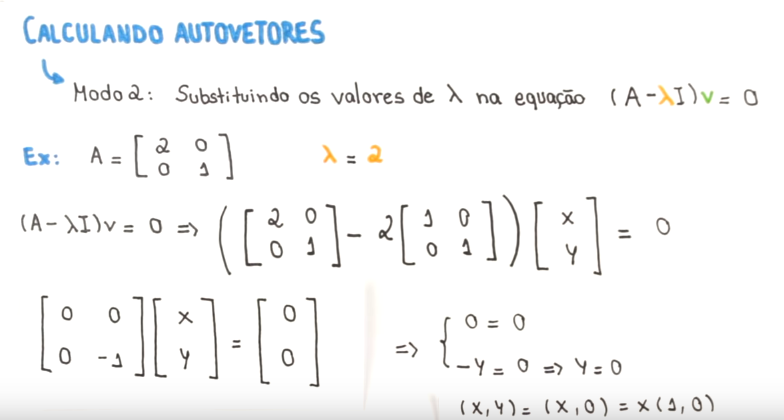

In [8]:
from numpy import *

X = np.array(
    [[1, 1, -1],
    [2, 0, -2],
    [-1, -2, 3]]
)

X_t = X.T

X_t_X = X @ X_t

autovalores, autovetores = np.linalg.eig(X_t_X)

print("Autovalores: ", autovalores)

# print("Autovetores: ", autovetores)

autovetor_1, autovetor_2 = autovetores[:2]
print("Autovetor 1: ", autovetor_1)
print("Autovetor 2: ", autovetor_2)

norma_vetor_1 = np.linalg.norm(autovetor_1)
norma_vetor_2 = np.linalg.norm(autovetor_2)

print("Norma do autovetor 1: ", norma_vetor_1)
print("Norma do autovetor 2: ", norma_vetor_2)

# def norma_vetor(v):
#     return np.sqrt(np.sum(v**2))

autovetor_normalizado_1 = autovetor_1 / np.linalg.norm(autovetor_1)
autovetor_normalizado_2 = autovetor_2 / np.linalg.norm(autovetor_2)

print("Autovetor 1 normalizado: ", autovetor_normalizado_1)
print("Autovetor 2 normalizado: ", autovetor_normalizado_2)


Coordenadas_fatores = []

for linha in X:
    coordenada = [0 , 0]
    for i in range(len(linha)):
        coordenada[0] += linha[i] * autovetor_normalizado_1[i]
        coordenada[1] += linha[i] * autovetor_normalizado_2[i]

    Coordenadas_fatores.append(coordenada)

print("Coordenadas dos fatores: ")
for coordenada in Coordenadas_fatores:
    print(coordenada)

Autovalores:  [22.24521707  0.29205672  2.46272621]
Autovetor 1:  [ 0.35083651  0.93500625 -0.0517403 ]
Autovetor 2:  [ 0.53149554 -0.15333037  0.833068  ]
Norma do autovetor 1:  0.9999999999999999
Norma do autovetor 2:  1.0
Autovetor 1 normalizado:  [ 0.35083651  0.93500625 -0.0517403 ]
Autovetor 2 normalizado:  [ 0.53149554 -0.15333037  0.833068  ]
Coordenadas dos fatores: 
[1.33758305859795, -0.4549028157962879]
[0.8051536176890597, -0.6031449015279537]
[-2.376069913902303, 2.2743691717981336]


In [8]:
import numpy as np

# Defina a matriz X
X = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, np.sqrt(2), -np.sqrt(2), 0, 0, 0],
    [0, 3*np.sqrt(2)/2, 3*np.sqrt(2)/2, 0, 0, 0],
    [0, 0, 0, 4, 0, 0],
    [0, 0, 0, 0, 5/2, -5*np.sqrt(3)/2],
    [0, 0, 0, 0, 3, 3*np.sqrt(3)]
])

# Calcule A = X(transposta) * X
A = np.dot(X.T, X)

C = np.dot(X, X.T)


# Calcule autovalores e autovetores
autovalores, autovetores = np.linalg.eig(A)

# Ordene autovalores e autovetores correspondentes
indices_ordenados = np.argsort(autovalores)[::-1]
autovalores_ordenados = autovalores[indices_ordenados]
autovetores_ordenados = autovetores[:, indices_ordenados]

# Selecione os dois maiores autovalores e autovetores para cada observação
for i in range(6):
    lambda_max = autovalores_ordenados[0]
    lambda_2nd_max = autovalores_ordenados[1]
    
    x_max = autovetores_ordenados[:, 0] / np.linalg.norm(autovetores_ordenados[:, 0])
    x_2nd_max = autovetores_ordenados[:, 1] / np.linalg.norm(autovetores_ordenados[:, 1])
    
    # Projete cada observação nos dois fatores
    O_i = np.array([
        np.dot(x_max, X[:, i]),
        np.dot(x_2nd_max, X[:, i])
    ])
    
    print(f"Observação {i+1}:")
    print(f"  Lambda_max: {lambda_max}")
    print(f"  Autovetor_max: {x_max}")
    print(f"  Lambda_2nd_max: {lambda_2nd_max}")
    print(f"  Autovetor_2nd_max: {x_2nd_max}")
    print(f"  Vetor_bidimensional_O_i: {O_i}")
    print()

Observação 1:
  Lambda_max: 46.47654530867046
  Autovetor_max: [0.         0.         0.         0.         0.15079082 0.98856569]
  Lambda_2nd_max: 16.0
  Autovetor_2nd_max: [0. 0. 0. 1. 0. 0.]
  Vetor_bidimensional_O_i: [0. 0.]

Observação 2:
  Lambda_max: 46.47654530867046
  Autovetor_max: [0.         0.         0.         0.         0.15079082 0.98856569]
  Lambda_2nd_max: 16.0
  Autovetor_2nd_max: [0. 0. 0. 1. 0. 0.]
  Vetor_bidimensional_O_i: [0. 0.]

Observação 3:
  Lambda_max: 46.47654530867046
  Autovetor_max: [0.         0.         0.         0.         0.15079082 0.98856569]
  Lambda_2nd_max: 16.0
  Autovetor_2nd_max: [0. 0. 0. 1. 0. 0.]
  Vetor_bidimensional_O_i: [0. 0.]

Observação 4:
  Lambda_max: 46.47654530867046
  Autovetor_max: [0.         0.         0.         0.         0.15079082 0.98856569]
  Lambda_2nd_max: 16.0
  Autovetor_2nd_max: [0. 0. 0. 1. 0. 0.]
  Vetor_bidimensional_O_i: [0. 4.]

Observação 5:
  Lambda_max: 46.47654530867046
  Autovetor_max: [0.         0

In [22]:
import random

# Defina o número de grupos e monitores
num_grupos = 12
monitores = ["Guilherme Jácome", "Felipe Duarte", "Tales Nobre", "Victória Grisi", "Rodrigo Verísisimo", "Jonas Leite",
      "Humberto Navarro", "Caio Lucas", "Frankley Kaiky", "João Paulo", "Felipe Lima", "Jonas Oliveira"]

# Crie listas de grupos e monitores
grupos = list(range(1, num_grupos + 1))

# Embaralhe a lista de grupos para distribuição aleatória
random.shuffle(grupos)

# Inicialize um dicionário para armazenar a distribuição
distribuicao = {}

# Distribua os monitores para cada grupo
for grupo in grupos:
    # Embaralhe a lista de monitores para distribuição aleatória
    random.shuffle(monitores)
    distribuicao[grupo] = monitores[:2]  # Pegue os dois primeiros monitores

# Imprima a distribuição
for grupo, monitores in distribuicao.items():
    print(f'Grupo {grupo}: Monitores {" e ".join(monitores)}')

Grupo 5: Monitores Jonas Leite e João Paulo
Grupo 9: Monitores Tales Nobre e Guilherme Jácome
Grupo 8: Monitores Guilherme Jácome e Felipe Duarte
Grupo 7: Monitores Tales Nobre e Frankley Kaiky
Grupo 1: Monitores Frankley Kaiky e Caio Lucas
Grupo 2: Monitores Guilherme Jácome e Humberto Navarro
Grupo 3: Monitores Humberto Navarro e Jonas Oliveira
Grupo 6: Monitores Felipe Duarte e Jonas Leite
Grupo 11: Monitores Caio Lucas e Jonas Oliveira
Grupo 10: Monitores João Paulo e Felipe Lima
Grupo 4: Monitores Victória Grisi e João Paulo
Grupo 12: Monitores Guilherme Jácome e Felipe Duarte
